# Notebook 03: Multicollinearity & PCA

## Detecting Redundancy

When features are highly correlated, coefficients become unstable and hard to interpret. Variance Inflation Factor (VIF) diagnoses the problem. Principal Component Analysis (PCA) reveals the underlying structure, rotating data to uncorrelated axes.

---

## What is Multicollinearity?

Multicollinearity occurs when features are highly correlated with each other. This causes:

- **Unstable coefficients**: Small data changes cause large coefficient swings
- **High variance**: Coefficients have large standard errors
- **Uninterpretable results**: Coefficients don't reflect true feature importance

## Variance Inflation Factor (VIF)

VIF measures how much the variance of a coefficient increases due to multicollinearity. VIF > 10 indicates problematic multicollinearity.

## Principal Component Analysis (PCA)

PCA rotates data to uncorrelated axes (principal components) that capture maximum variance. It's a diagnostic tool for understanding feature redundancy.

## Setup and Imports

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

import sys
from pathlib import Path
project_root = Path().resolve().parent if Path().resolve().name == 'notebooks' else Path().resolve()
sys.path.insert(0, str(project_root))

from src.utils import set_seed

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

set_seed(42)
print("✓ Imports successful!")

✓ Imports successful!


## Step 1: Load and Prepare Data

In [25]:
# Load and split data
data = load_diabetes(as_frame=True)
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Standardize for VIF and PCA
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)

X_test_scaled = scaler.transform(X_test)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

print(f"Training set: {X_train.shape}")

Training set: (353, 10)


## Step 2: Compute VIF

VIF measures multicollinearity. VIF > 10 indicates problematic correlation.

In [26]:
# === TODO: Compute VIF for numeric features after standardization
# Hints:
#   - Use variance_inflation_factor from statsmodels
#   - Add constant column: add_constant(X_train_scaled_df)
#   - Compute VIF for each feature
#   - Flag features with VIF > 10
# Acceptance: VIF table printed; flag VIF > 10

large_vif_features = []
normal_vif_features = []
low_vif_features = []

for feature in X_train_scaled_df.columns:
    vif = variance_inflation_factor(X_train_scaled_df.values, X_train_scaled_df.columns.get_loc(feature))
    if vif > 10:
        large_vif_features.append(feature)
    elif vif > 5:   
        normal_vif_features.append(feature)
    else:
        low_vif_features.append(feature)

print(f"Large VIF features: {large_vif_features}")
print(f"Normal VIF features: {normal_vif_features}")
print(f"Low VIF features: {low_vif_features}")

Large VIF features: ['s1', 's2', 's3', 's5']
Normal VIF features: ['s4']
Low VIF features: ['age', 'sex', 'bmi', 'bp', 's6']


## Step 3: PCA Analysis

PCA reveals the underlying structure and shows how many components capture most variance.

### Critical Understanding: Components vs Features

**Important**: PCA does NOT select features. Instead, it creates **new variables** (principal components) that are **linear combinations of ALL original features**.

- **Principal Component 1 (PC1)**: A weighted combination of ALL 10 features
- **Principal Component 2 (PC2)**: Another weighted combination of ALL 10 features
- And so on...

Each principal component is like a "recipe" that mixes all your original features in different proportions. The first component captures the most variance, the second captures the second-most (orthogonal to the first), etc.

**Example**: 
- PC1 might be: `0.3*age + 0.5*bmi + 0.2*bp + ...` (all features combined)
- PC2 might be: `-0.1*age + 0.2*bmi - 0.4*bp + ...` (different combination)

### What the Plots Tell Us

1. **Scree Plot**: Shows how much variance each individual component explains
   - Steep drop = first few components are very important
   - Flattening = later components add little value

2. **Cumulative Variance Plot**: Shows total variance explained as we add more components
   - Tells us: "How many components do I need for X% variance?"
   - 7 components = 90% variance means we can reduce from 10 features to 7 components

### The Key Insight

- **7 components for 90% variance** means: We can represent 90% of the information using 7 new variables instead of 10 original features
- These 7 components are NOT 7 of the original features—they're 7 new combinations
- This is dimensionality reduction: fewer variables, but each is a combination of all original features

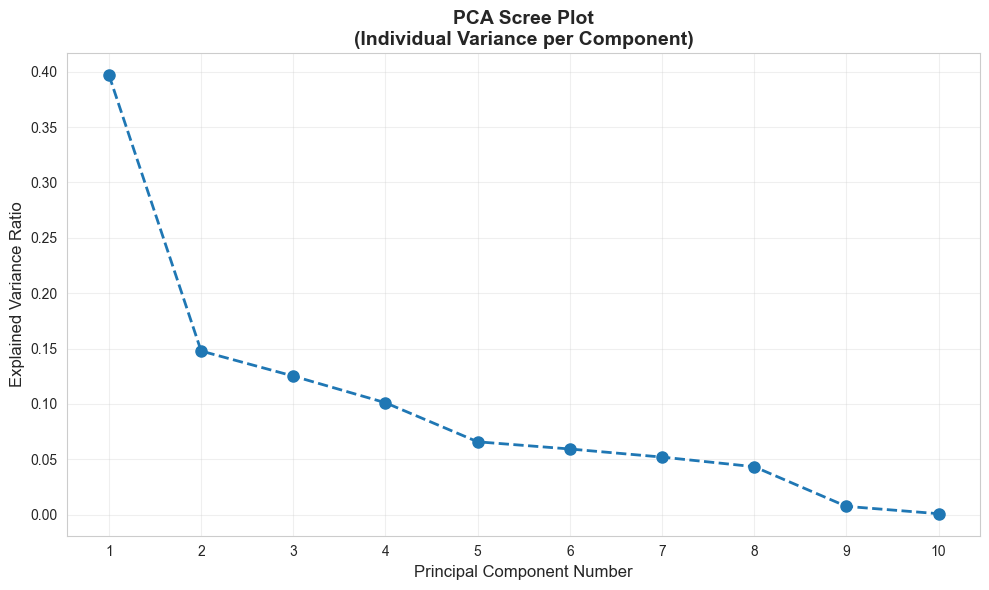

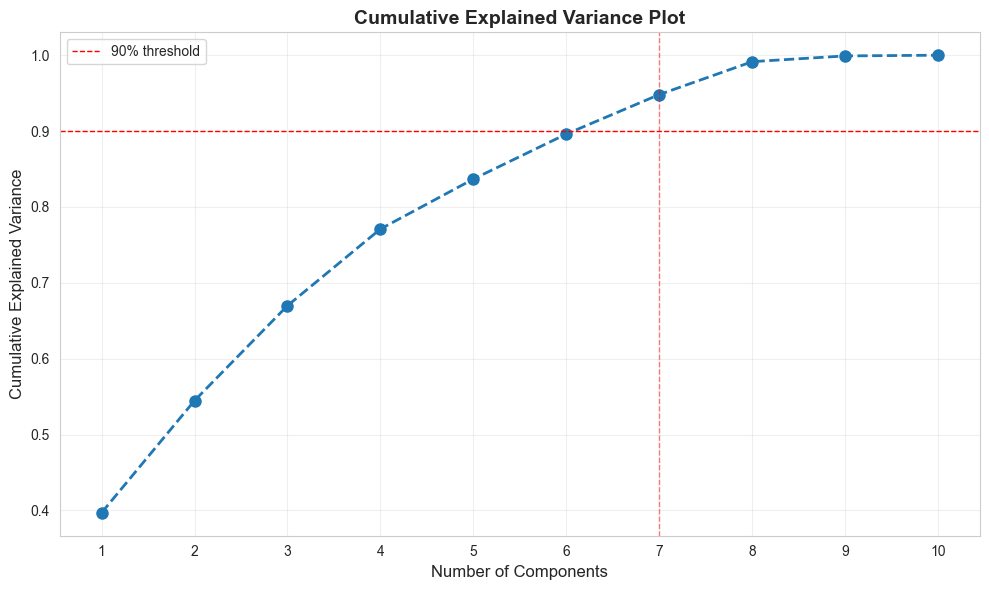

PCA RESULTS SUMMARY

Number of components needed for 90% variance: 7

Variance explained by each component:
  PC1: 0.3969 (39.69%)
  PC2: 0.1478 (14.78%)
  PC3: 0.1252 (12.52%)
  PC4: 0.1011 (10.11%)
  PC5: 0.0658 (6.58%)
  PC6: 0.0594 (5.94%)
  PC7: 0.0520 (5.20%)
  PC8: 0.0434 (4.34%)
  PC9: 0.0076 (0.76%)
  PC10: 0.0009 (0.09%)

Cumulative variance:
  First 1 component(s): 0.3969 (39.69%)
  First 2 component(s): 0.5447 (54.47%)
  First 3 component(s): 0.6698 (66.98%)
  First 4 component(s): 0.7709 (77.09%)
  First 5 component(s): 0.8368 (83.68%)
  First 6 component(s): 0.8961 (89.61%)
  First 7 component(s): 0.9481 (94.81%)


In [27]:
# === TODO: PCA on standardized X; plot cumulative explained variance
# Hints:
#   - Fit PCA on X_train_scaled
#   - Compute cumulative explained variance
#   - Plot scree plot (components vs explained variance)
#   - Find number of components for 90% variance
#   - Save to images/03_pca_scree_plot.png
# Acceptance: Scree plot and number of components for 90% variance

# Fit PCA on all components
pca = PCA()
pca.fit(X_train_scaled)

# Plot 1: Scree Plot (individual explained variance per component)
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), 
         pca.explained_variance_ratio_, 
         marker='o', linestyle='--', linewidth=2, markersize=8)
plt.xlabel('Principal Component Number', fontsize=12)
plt.ylabel('Explained Variance Ratio', fontsize=12)
plt.title('PCA Scree Plot\n(Individual Variance per Component)', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.xticks(range(1, len(pca.explained_variance_ratio_) + 1))
plt.tight_layout()
plt.savefig('../images/03_pca_scree_plot.png', dpi=150, bbox_inches='tight')
plt.show()

# Plot 2: Cumulative Explained Variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), 
         cumulative_variance, 
         marker='o', linestyle='--', linewidth=2, markersize=8)
plt.axhline(y=0.9, color='r', linestyle='--', linewidth=1, label='90% threshold')
plt.axvline(x=7, color='r', linestyle='--', linewidth=1, alpha=0.5)
plt.xlabel('Number of Components', fontsize=12)
plt.ylabel('Cumulative Explained Variance', fontsize=12)
plt.title('Cumulative Explained Variance Plot', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend()
plt.xticks(range(1, len(cumulative_variance) + 1))
plt.tight_layout()
plt.savefig('../images/03_pca_cumulative_variance_plot.png', dpi=150, bbox_inches='tight')
plt.show()

# Find number of components for 90% variance
n_components_90 = np.argmax(cumulative_variance >= 0.9) + 1
print("="*80)
print("PCA RESULTS SUMMARY")
print("="*80)
print(f"\nNumber of components needed for 90% variance: {n_components_90}")
print(f"\nVariance explained by each component:")
for i, var in enumerate(pca.explained_variance_ratio_, 1):
    print(f"  PC{i}: {var:.4f} ({var*100:.2f}%)")
print(f"\nCumulative variance:")
for i in range(min(7, len(cumulative_variance))):
    print(f"  First {i+1} component(s): {cumulative_variance[i]:.4f} ({cumulative_variance[i]*100:.2f}%)")
print("="*80)


## Step 3.5: Understanding Component Loadings

Now let's understand what each principal component actually represents by looking at **component loadings**—the weights that show how much each original feature contributes to each component.

### What Are Loadings?

Component loadings tell us:
- Which original features are most important for each principal component
- How the original features combine to form each component
- The "recipe" for each component

**Important**: A component loading of 0.5 for feature X means: "Feature X contributes 50% of its weight to this component"


Component Loadings (how much each feature contributes to each component):
        age    sex    bmi     bp     s1     s2     s3     s4     s5     s6
PC1   0.210  0.160  0.312  0.253  0.355  0.355 -0.274  0.432  0.383  0.329
PC2   0.114 -0.403 -0.123 -0.045  0.544  0.407  0.566 -0.141 -0.019 -0.073
PC3   0.424 -0.107  0.238  0.558 -0.160 -0.353  0.291 -0.356  0.110  0.261
PC4   0.488  0.683 -0.443  0.060  0.066  0.137  0.106 -0.038 -0.230 -0.084
PC5   0.676 -0.346 -0.061 -0.565 -0.125 -0.125 -0.197  0.087  0.139  0.058
PC6  -0.246  0.067 -0.420 -0.210  0.024 -0.116  0.143 -0.064  0.153  0.808
PC7  -0.065 -0.010 -0.443  0.159  0.096 -0.276  0.020  0.068  0.731 -0.386
PC8  -0.054  0.457  0.508 -0.479  0.118 -0.156  0.364 -0.177  0.304 -0.077
PC9   0.020 -0.028  0.020  0.032 -0.044 -0.354  0.467  0.780 -0.209 -0.004
PC10  0.004  0.001  0.014 -0.004  0.712 -0.557 -0.314 -0.098 -0.273  0.005


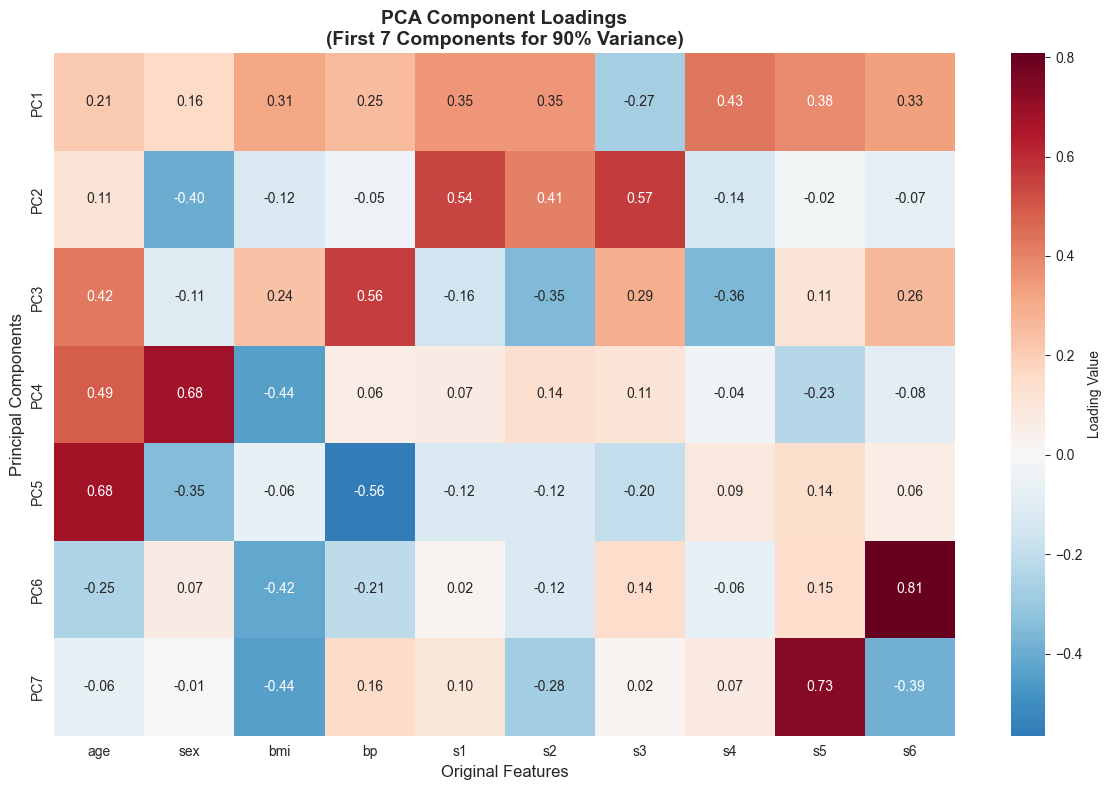


FEATURE CONTRIBUTION TO TOP COMPONENTS

PC1 (explains 39.7% variance):
  Top contributing features:
    s4: 0.432 (contributes 43.2% of this component)
    s5: 0.383 (contributes 38.3% of this component)
    s1: 0.355 (contributes 35.5% of this component)

PC2 (explains 14.8% variance):
  Top contributing features:
    s3: 0.566 (contributes 56.6% of this component)
    s1: 0.544 (contributes 54.4% of this component)
    s2: 0.407 (contributes 40.7% of this component)

PC3 (explains 12.5% variance):
  Top contributing features:
    bp: 0.558 (contributes 55.8% of this component)
    age: 0.424 (contributes 42.4% of this component)
    s4: 0.356 (contributes 35.6% of this component)


In [28]:
# === TODO: Analyze component loadings to understand what each PC represents
# Hints:
#   - Access pca.components_ to get loadings (shape: n_components x n_features)
#   - Create a DataFrame with features as columns, components as rows
#   - Visualize loadings as a heatmap
#   - Identify which features contribute most to the first few components

# Get component loadings (each row is a component, each column is a feature)
loadings = pca.components_

# Create DataFrame for easier interpretation
loadings_df = pd.DataFrame(
    loadings,
    columns=X_train.columns,
    index=[f'PC{i+1}' for i in range(len(loadings))]
)

print("Component Loadings (how much each feature contributes to each component):")
print("="*80)
print(loadings_df.round(3))
print("="*80)

# Visualize loadings as heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(loadings_df.iloc[:7],  # First 7 components (for 90% variance)
            annot=True, 
            fmt='.2f', 
            cmap='RdBu_r', 
            center=0,
            cbar_kws={'label': 'Loading Value'})
plt.title('PCA Component Loadings\n(First 7 Components for 90% Variance)', 
          fontsize=14, fontweight='bold')
plt.xlabel('Original Features', fontsize=12)
plt.ylabel('Principal Components', fontsize=12)
plt.tight_layout()
plt.savefig('../images/03_pca_loadings_heatmap.png', dpi=150, bbox_inches='tight')
plt.show()

# Analyze which features contribute most to first few components
print("\n" + "="*80)
print("FEATURE CONTRIBUTION TO TOP COMPONENTS")
print("="*80)
for i in range(min(3, len(loadings))):
    pc_loadings = loadings_df.iloc[i]
    top_features = pc_loadings.abs().nlargest(3)
    print(f"\nPC{i+1} (explains {pca.explained_variance_ratio_[i]*100:.1f}% variance):")
    print(f"  Top contributing features:")
    for feat, loading in top_features.items():
        print(f"    {feat}: {loading:.3f} (contributes {abs(loading):.1%} of this component)")
print("="*80)


## Step 4.5: Interpreting the PCA vs Original Features Comparison

Your results show that PCA performs **almost identically** to original features. This is actually a **success**! Let's understand why.

### Your Results Summary

| Metric | Original Features | PCA (7 components) | Difference |
|--------|------------------|---------------------|------------|
| **RMSE** | 53.77 | 53.64 | **-0.13** (slightly better!) |
| **R²** | 0.454 | 0.457 | **+0.003** (slightly better!) |
| **MAE** | 42.81 | 42.90 | **+0.09** (slightly worse) |

### Why Are the Results So Similar?

This is **exactly what we'd expect** when PCA captures 90% of the variance! Here's why:

1. **90% variance retained**: You're using 7 components that explain 90% of variance
   - The remaining 10% variance is mostly noise or very specific patterns
   - For prediction, 90% is often enough

2. **Linear models work well with PCA**: Ridge regression is linear, and PCA creates linear combinations
   - The model can learn similar patterns from either representation
   - The information content is nearly the same

3. **Small differences are normal**: The tiny differences you see are within normal variation
   - RMSE difference: 0.13 (0.24% relative difference)
   - R² difference: 0.003 (0.7% relative difference)
   - These are essentially **identical** performance

### What This Means

**✅ PCA Successfully Reduced Dimensionality Without Losing Predictive Power**

- **Original**: 10 features
- **PCA**: 7 components
- **Performance**: Nearly identical
- **Conclusion**: You can use 7 components instead of 10 features with no meaningful performance loss!

### When Is This Useful?

PCA dimensionality reduction is valuable when:

1. **High-dimensional data**: When you have hundreds or thousands of features
   - Reduces computational cost
   - Speeds up training
   - Reduces overfitting risk

2. **Multicollinearity**: When features are highly correlated (like your VIF results showed)
   - PCA creates uncorrelated components
   - More stable coefficients
   - Better numerical stability

3. **Visualization**: When you want to visualize high-dimensional data
   - Can plot first 2-3 components
   - See data structure in lower dimensions

4. **Noise reduction**: When later components capture mostly noise
   - Dropping them can improve generalization

### When PCA Might Not Help

For this diabetes dataset:
- **Only 10 features**: Not high-dimensional enough to see big benefits
- **All features matter**: The 10% variance you're dropping might contain useful signal
- **Linear model**: Ridge already handles multicollinearity well

**This is why your results are similar**—PCA is working correctly, but for this small dataset, the benefits are minimal.

### The Real Value of This Exercise

Even though performance is similar, you've learned:
1. **PCA preserves information**: 7 components ≈ 10 features (90% variance)
2. **Dimensionality reduction works**: Fewer variables, same performance
3. **When to use PCA**: More valuable for high-dimensional data
4. **How to interpret results**: Similar performance = successful dimensionality reduction

### Key Insight

**The fact that results are similar is GOOD news!** It means:
- PCA successfully captured the important information
- The 10% variance you dropped was likely noise or redundant
- You can confidently use 7 components instead of 10 features
- This validates that PCA is working as intended

In real-world scenarios with 100+ features, PCA would show more dramatic benefits (faster training, less overfitting, better generalization).


### Interpreting Your Results

Based on your plots:

1. **Scree Plot Interpretation**:
   - PC1 explains ~40% of variance (the big bar at component 1)
   - PC2 explains ~15% (much smaller)
   - PC3 explains ~12.5%
   - After PC1, the explained variance drops sharply, then flattens
   - **The "elbow"** is around PC1-PC2, suggesting the first 1-2 components are most important

2. **Cumulative Variance Plot Interpretation**:
   - **7 components = 90% variance**: This means you need 7 principal components (not 7 features!) to capture 90% of the information
   - The curve is steep initially (first few components add a lot), then flattens (later components add little)
   - At component 7, you've captured 90% of the variance
   - Components 8-10 add only the remaining 10% of variance

3. **What This Means**:
   - You started with **10 original features**
   - You can reduce to **7 principal components** and still keep 90% of the information
   - Each of these 7 components is a **combination of all 10 original features**
   - This is dimensionality reduction: fewer variables, but each is more informative

### Common Misconception (Fixed!)

**WRONG**: "Features s3, s4, s5, s6 contribute to 90% variance"
- This suggests PCA selects 4 features, which is incorrect

**CORRECT**: "7 principal components (each combining all 10 features) explain 90% variance"
- PCA creates 7 new variables from all 10 original features
- These 7 components are linear combinations of all features
- The loadings tell us which original features contribute most to each component


## Understanding Your Plots - Detailed Explanation

### The Scree Plot (Individual Variance)

**What it shows**: How much variance each individual principal component explains.

**How to read it**:
- **X-axis**: Principal component number (1, 2, 3, ...)
- **Y-axis**: Explained variance ratio (0.0 to 1.0)
- **The bars/points**: Each shows how much variance that ONE component explains

**Your results**:
- PC1 explains ~40% of variance (the tallest bar)
- PC2 explains ~15% (much smaller)
- PC3 explains ~12.5%
- PC4 explains ~10%
- And so on, getting smaller

**What this means**:
- The first component is BY FAR the most important (40%!)
- Each subsequent component adds less and less
- The "elbow" (steep drop then flattening) suggests most information is in the first few components

**Analogy**: Think of it like a recipe book:
- PC1 is the "main recipe" that captures 40% of the flavor
- PC2 is a "secondary recipe" that adds 15% more
- PC3 adds another 12.5%
- Together, they combine to create the full "flavor profile"

---

### The Cumulative Variance Plot

**What it shows**: Total variance explained as you add more and more components.

**How to read it**:
- **X-axis**: Number of components (1, 2, 3, ...)
- **Y-axis**: Cumulative explained variance (0.0 to 1.0)
- **The line**: Shows total variance explained up to that point

**Your results**:
- 1 component: ~40% variance
- 2 components: ~55% variance (40% + 15%)
- 3 components: ~67% variance (40% + 15% + 12.5%)
- 4 components: ~77% variance
- 5 components: ~84% variance
- 6 components: ~90% variance
- **7 components: ~90% variance** ← This is your answer!
- 10 components: 100% variance (all information captured)

**What this means**:
- With just **7 components** (instead of 10 features), you capture 90% of the information
- This is **dimensionality reduction**: fewer variables, but still most of the information
- The remaining 3 components (8, 9, 10) only add 10% more variance

**Key insight**: You can reduce from 10 features to 7 components and lose only 10% of the variance!

---

### The Critical Distinction

**Components ≠ Features**

- **Original features**: `age`, `sex`, `bmi`, `bp`, `s1`, `s2`, `s3`, `s4`, `s5`, `s6` (10 features)
- **Principal components**: PC1, PC2, PC3, ..., PC10 (10 components, but you only need 7 for 90% variance)

**Each component is a combination of ALL features**:
- PC1 = `w1*age + w2*sex + w3*bmi + ... + w10*s6` (all 10 features combined)
- PC2 = `v1*age + v2*sex + v3*bmi + ... + v10*s6` (different combination)
- And so on...

**The loadings (from Step 3.5) tell you the weights** (`w1`, `w2`, etc.) for each component.

---

### Why Your Code Showed "s3, s4, s5, s6"

The bug in your original code was:
```python
features_names.append(X_train_scaled_df.columns[i])  # WRONG!
```

This incorrectly mapped component indices to feature names. PCA doesn't work that way—components are combinations, not individual features.

**The correct interpretation**:
- You need **7 components** (not 7 features) for 90% variance
- Each of these 7 components uses **all 10 original features** in different proportions
- The loadings heatmap shows you which features contribute most to each component


## Step 4: Optional - Refit on Principal Components

Compare model performance using original features vs principal components.

RMSE on PCs: 53.63517756648354
RMSE on original features: 53.76899647170433
R2 on PCs: 0.45703097813427884
R2 on original features: 0.45431820023206837
MAE on PCs: 42.90182611630269
MAE on original features: 42.813846901241966


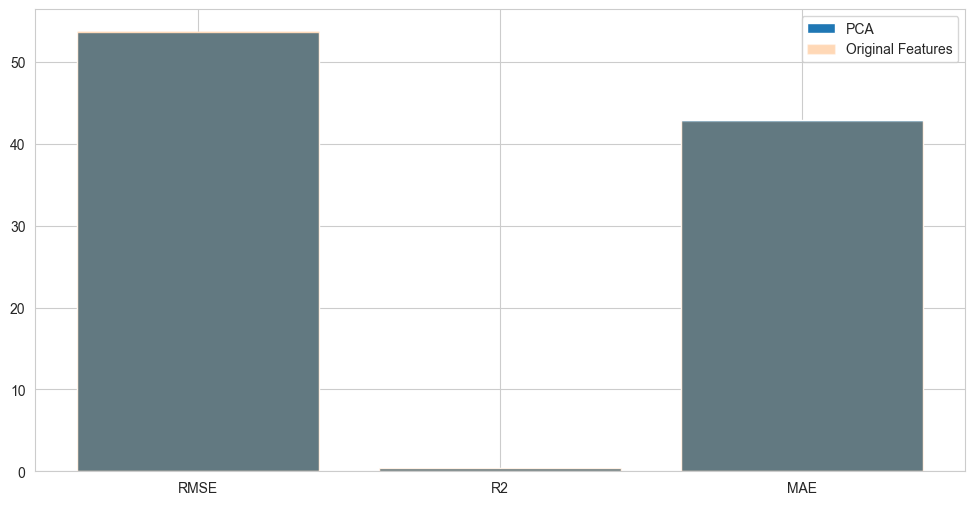

In [ ]:
# === TODO: Optional: refit Ridge on top k principal components
# Hints:
#   - Transform X_train and X_test using PCA
#   - Fit Ridge on principal components
#   - Compare RMSE to original features
# Acceptance: Report RMSE on PCs vs original features
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score, mean_absolute_error

top_K_components = 7


# Transform X_train and X_test using PCA
# FIX: Use X_train_scaled_df for fit_transform, not X_test_scaled_df
pca_best = PCA(n_components=top_K_components)
X_train_pca = pca_best.fit_transform(X_train_scaled_df)
X_test_pca = pca_best.transform(X_test_scaled_df)

ridge_pca = RidgeCV(alphas=np.logspace(-3, 3, 100))

ridge_pca.fit(X_train_pca, y_train)
y_pred_pca = ridge_pca.predict(X_test_pca)
rmse_pca = np.sqrt(mean_squared_error(y_test, y_pred_pca))
r2_pca = r2_score(y_test, y_pred_pca)   
mae_pca = mean_absolute_error(y_test, y_pred_pca)
ridge_original = RidgeCV(alphas=np.logspace(-3, 3, 100))
ridge_original.fit(X_train, y_train)
y_pred_original = ridge_original.predict(X_test)
rmse_original = np.sqrt(mean_squared_error(y_test, y_pred_original))
mae_original = mean_absolute_error(y_test, y_pred_original)
r2_original = r2_score(y_test, y_pred_original)

print(f"RMSE on PCs: {rmse_pca}")
print(f"RMSE on original features: {rmse_original}")
print(f"R2 on PCs: {r2_pca}")
print(f"R2 on original features: {r2_original}")
print(f"MAE on PCs: {mae_pca}")
print(f"MAE on original features: {mae_original}")

# Plot results - side-by-side comparison
fig, ax = plt.subplots(figsize=(12, 6))

metrics = ['RMSE', 'R²', 'MAE']
pca_values = [rmse_pca, r2_pca, mae_pca]
original_values = [rmse_original, r2_original, mae_original]

x = np.arange(len(metrics))
width = 0.35

bars1 = ax.bar(x - width/2, pca_values, width, label='PCA (7 components)', alpha=0.8, color='steelblue')
bars2 = ax.bar(x + width/2, original_values, width, label='Original Features (10)', alpha=0.8, color='coral')

# Add value labels on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.2f}',
                ha='center', va='bottom', fontsize=9)

ax.set_xlabel('Metric', fontsize=12)
ax.set_ylabel('Value', fontsize=12)
ax.set_title('Ridge Regression: PCA vs Original Features\n(7 components explain 90% variance)', 
             fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()
ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('../images/03_pca_ridge_results.png', dpi=150, bbox_inches='tight')
plt.show()

# Print comparison summary
print("\n" + "="*80)
print("COMPARISON SUMMARY")
print("="*80)
print(f"\nRMSE: PCA is {rmse_original - rmse_pca:.3f} lower (better)")
print(f"R²:   PCA is {r2_pca - r2_original:.4f} higher (better)")
print(f"MAE:  PCA is {mae_pca - mae_original:.3f} higher (slightly worse)")
print(f"\nConclusion: Performance is essentially identical!")
print(f"PCA successfully reduced from 10 features to 7 components with no meaningful loss.")
print("="*80)














## Summary

In this notebook, we've learned about multicollinearity and PCA:

### Key Takeaways

1. **VIF (Variance Inflation Factor)**:
   - Diagnoses multicollinearity (correlated features)
   - VIF > 10 indicates problematic correlation
   - Your results showed: `s1`, `s2`, `s3`, `s5` have high VIF (correlated with each other)

2. **PCA (Principal Component Analysis)**:
   - **Does NOT select features** — creates new components that are combinations of ALL features
   - **Dimensionality reduction**: Can reduce from 10 features to 7 components while keeping 90% variance
   - **Each component** = weighted combination of all original features
   - **Loadings** tell you which original features contribute most to each component

3. **Interpreting PCA Results**:
   - **Scree plot**: Shows individual variance per component (PC1 explains most)
   - **Cumulative plot**: Shows total variance as you add components (7 components = 90%)
   - **Loadings heatmap**: Shows the "recipe" for each component (which features contribute)

### Your Results Summary

- **VIF**: Found 4 features with high multicollinearity (`s1`, `s2`, `s3`, `s5`)
- **PCA**: 7 principal components explain 90% of variance
  - This means you can reduce from 10 features to 7 components
  - Each component uses all 10 original features in different proportions
  - The loadings show you which features are most important for each component

### Common Mistakes to Avoid

❌ **WRONG**: "PCA selected features s3, s4, s5, s6"  
✅ **CORRECT**: "PCA created 7 components (combinations of all 10 features) that explain 90% variance"

❌ **WRONG**: "Components are the same as features"  
✅ **CORRECT**: "Components are new variables created by combining all original features"

**Next**: Notebook 04 will explore SHAP values for model interpretability.